In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import pickle
import IPython.display as ipd
from IPython.core.display import display, HTML, Javascript
import music21
import json, random
import guitarpro
%matplotlib inline

In [2]:
import keras
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [3]:
%run ../Utilities/Utilities.ipynb

In [4]:
data = pd.read_pickle("correction-data.pkl")

In [9]:
data.columns[16]

'y_note_4'

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, data.columns[16:])

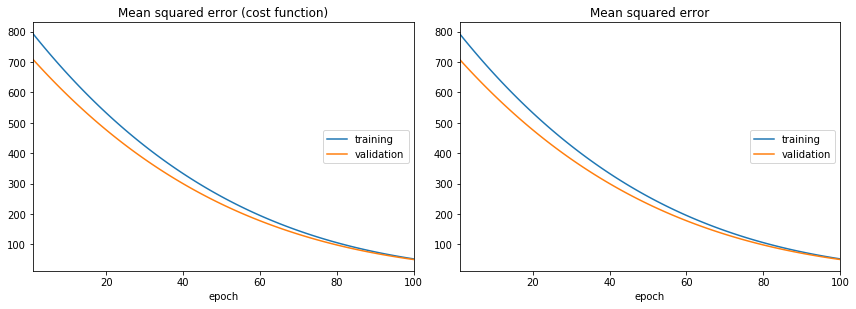

Mean squared error (cost function):
training   (min:   52.185, max:  792.953, cur:   52.185)
validation (min:   50.146, max:  708.460, cur:   50.146)

Mean squared error:
training   (min:   52.185, max:  792.953, cur:   52.185)
validation (min:   50.146, max:  708.460, cur:   50.146)
Train score: 50.24884033203125
Train accuracy: 50.24884033203125
Validation score: 50.145896911621094
Validation accuracy: 50.145896911621094


In [18]:
inputs = Input(shape=(16,))
hidden1 = Dense(256, kernel_regularizer=l1(0.000))(inputs)
preds = Dense(16, activation="linear")(hidden1)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, batch_size=None, epochs=100, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])